# Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
df = pd.read_csv("diabetes.csv") #Reading Dataset

df.head() #Displays first 5 columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


# Understanding The Dataset

In [3]:
df.shape # shape - (no. of rows, no. of columns)

(2000, 9)

In [4]:
df.columns # Name of columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.dtypes # Data Types of each column

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.info() #basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
df.describe().T #Description/summary of the dataframe

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [8]:
df.isna().sum() #counting the number of null values in each column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df = df.rename(columns={"DiabetesPedigreeFunction":"DPF"}) #Renaming DiabetesPedigreeFunction to DPF for simplicity

df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
911,2,83,66,23,50,32.2,0.497,22,0


In [10]:
df.Outcome.value_counts() #Counting the number of '0' and '1' in outcome column

0    1316
1     684
Name: Outcome, dtype: int64

In [11]:
df.Outcome.value_counts(normalize = True) #Percentage of split

0    0.658
1    0.342
Name: Outcome, dtype: float64

# Feature Engineering

In [12]:
 # To replace the 0 values present in 'BloodPressure', 'SkinThickness', 'Insulin', 'Glucose',  'BMI' features
[
     df.loc[df[column] == 0,column].count() for column in ["SkinThickness", "BloodPressure", "Insulin", "Glucose", "BMI"]
]

[573, 90, 956, 13, 28]

In [13]:
# we replace zeros with mean, median depending upon distribution

df["SkinThickness"] = np.where( df["SkinThickness"] == 0, df["SkinThickness"].mean(), df["SkinThickness"])

df[ "BloodPressure"] = np.where( df[ "BloodPressure"] == 0, df[ "BloodPressure"].mean(), df[ "BloodPressure"])

df["Insulin"] = np.where( df["Insulin"] == 0, df["Insulin"].mean(), df["Insulin"])

df["Glucose"] = np.where( df["Glucose"] == 0, df["Glucose"].mean(), df["Glucose"])

df["BMI"] = np.where( df["BMI"] == 0, df["BMI"].mean(), df["BMI"])

In [14]:
# Checking the number of 0 values present
[
    df.loc[df[column] == 0, column].count() for column in ["SkinThickness", "BloodPressure", "Insulin", "Glucose", "BMI"]
]

[0, 0, 0, 0, 0]

# Correlation

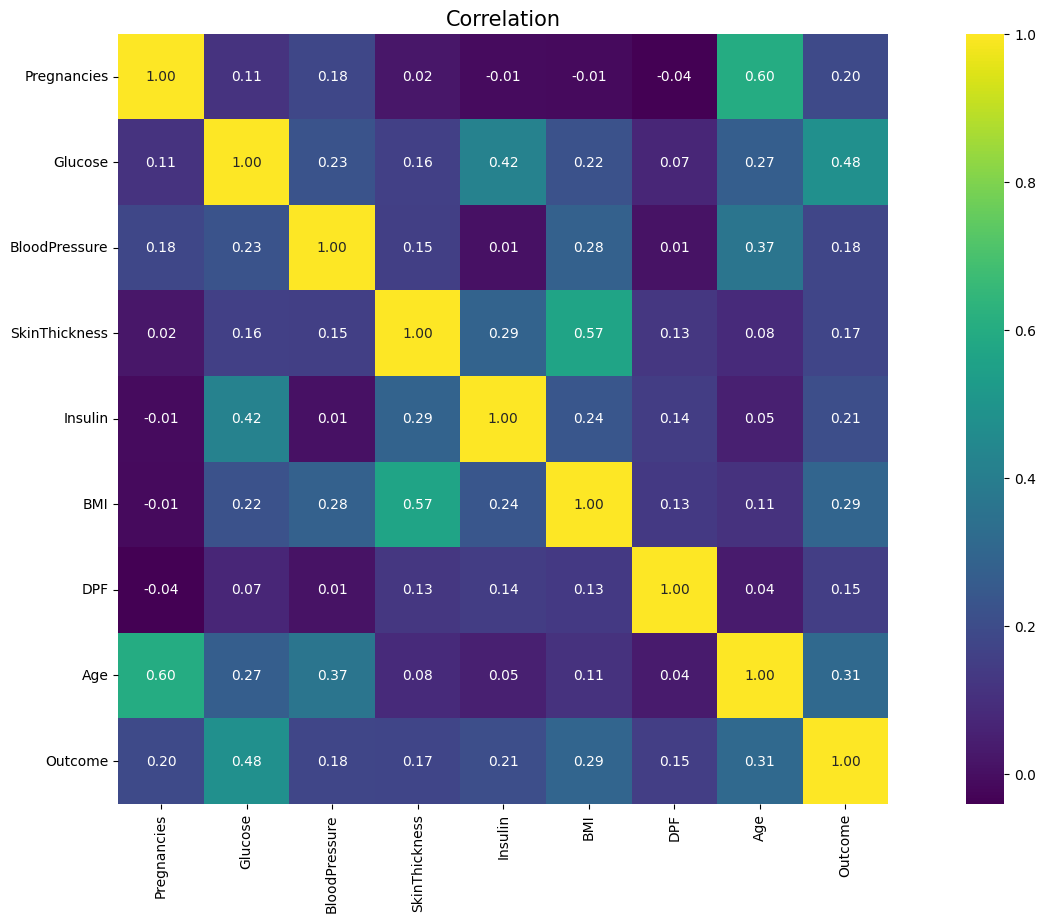

In [15]:
# create a spearman correlation heatmap with figure size (20, 10)
plt.figure(figsize=(20, 10))

sns.heatmap(df.corr( method="spearman" ), annot=True, fmt=".2f", square=True, cmap="viridis")

plt.title("Correlation", size=15)

plt.show()

# Data Splitting

In [16]:
X = df.drop(["Outcome"],axis = 1) # X contains all independant variables
y = df["Outcome"] # Y contains only the dependant variable

In [17]:
X[ : 5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,2,138.0,62.0000,35.000,80.254,33.6,0.127,47
1,0,84.0,82.0000,31.000,125.000,38.2,0.233,23
2,0,145.0,69.1455,20.935,80.254,44.2,0.630,31
3,0,135.0,68.0000,42.000,250.000,42.3,0.365,24
4,1,139.0,62.0000,41.000,480.000,40.7,0.536,21


In [18]:
y[ : 5]

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

# splitting X and Y as train & test sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

# Model Fitting

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
)

In [21]:
# fitting the random forest model
rf_clf = RandomForestClassifier(n_estimators=20, random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [22]:
y_pred = rf_clf.predict(X_test)

**Accuracy:**

In [23]:
print(accuracy_score(y_test, y_pred))

0.975


**Error:**

In [24]:
print(1 - accuracy_score(y_test, y_pred))

0.025000000000000022


**Recall:**

In [25]:
print(recall_score(y_test, y_pred))

1.0


**Precision:**

In [26]:
print(precision_score(y_test, y_pred))

0.9259259259259259


**F1** **Score:**

In [27]:
print(f1_score(y_test, y_pred))

0.9615384615384615


**Confusion** **Matrix**

In [28]:
confusion_matrix(y_test, y_pred)

array([[265,  10],
       [  0, 125]])

In [29]:
!pip install scikit-plot

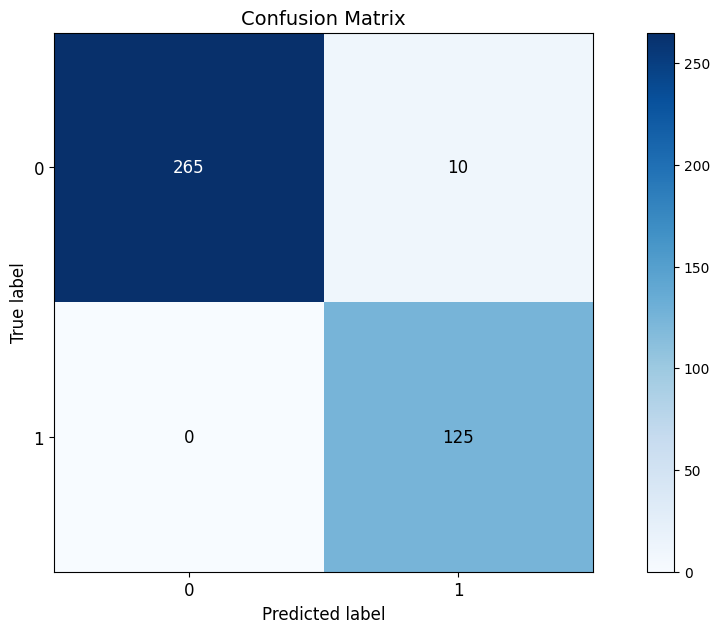

In [30]:
from scikitplot.metrics import (plot_confusion_matrix)

plot_confusion_matrix( y_test, y_pred, figsize=(14, 7), title_fontsize=14, text_fontsize=12 )
plt.show()

# Predictions:

In [31]:
# function to predict using the trained model
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]

    return rf_clf.predict(x)

In [32]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)
print("Oops! You have diabetes." if prediction else "Great! You don't have diabetes.")

Great! You don't have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)
print("Oops! You have diabetes." if prediction else "Great! You don't have diabetes.")

Oops! You have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
